### Student Details

Student Name: Elsa Anza Martín

Student ID: 21272808

# Task 2: Naive Bayes Classifier

In this proyect we train and test a Classifier that will predict the gender of a person based on two variables: height and weight.


Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers


In [ ]:
# import dependencies
import numpy as np
import pandas
import random
import matplotlib.pyplot as plt


In [ ]:
# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

In [ ]:
# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

Data is separated in two groups regarding gender and plotted is subsequently using two differnt colors.

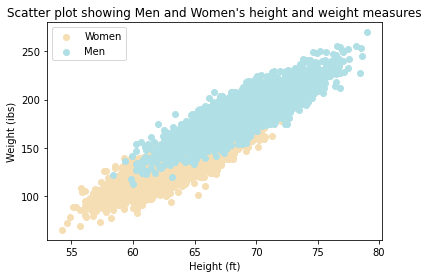

In [ ]:
# Data is displayed in a scatter plot using different colors for each genders.

data_female = data.loc[data['Gender'] == 'Female']
data_male = data.loc[data['Gender'] == 'Male']
x = data_female['Height']
y = data_female['Weight']

plt.scatter(x, y, color = 'wheat')


x = data_male['Height']
y = data_male['Weight']
plt.scatter(x, y, color = 'powderblue')

plt.xlabel("Height (ft)")
plt.ylabel("Weight (ibs)")

plt.title("Scatter plot showing Men and Women's height and weight measures")

plt.legend(['Women', 'Men'])
plt.show()


#### Discuss: Do you think there is resonable separation?

Not apparently. Two variables are most probably not enough to train with enough accuracy a classifier of this sort.
The reason behind this is that both genders overlap in the xy plane and therefore a significant amount of samples which fall into the central region of the plot will have near-to equal probabilities of belonging to either class, making them therefore indistinguishable.

A higher number of variables is probably the key to obtaining a more accurate classifier, for example adding a third measurement like body temperature or body fat percentage.
This will bring us additional information necessary for a more accurate classification.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [ ]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [ ]:
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size= 0.33)

ValueError: ignored

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [ ]:
from sklearn.naive_bayes import GaussianNB

gender_model = GaussianNB().fit(X_train, y_train)
y_pred= gender_model.predict(X_test)

### Test the algorithm
Test using the test data and print predictions and actual values

In [ ]:
print(X_test) #test data
print()
print(y_pred) #predicted values for the test group
print(y_test.values) #actual values(labels) for the same test group

         Height      Weight
4487  68.485214  184.657140
3874  69.053924  171.775983
9724  63.033676  127.640417
8758  63.390357  128.617638
5174  66.252604  150.096455
...         ...         ...
3624  68.928717  167.415549
2423  67.290776  154.718344
3024  68.689515  180.932596
171   72.213963  205.389761
5531  63.435594  120.184683

[3300 rows x 2 columns]

['Male' 'Male' 'Female' ... 'Male' 'Male' 'Female']
['Male' 'Male' 'Female' ... 'Male' 'Male' 'Female']


### Accuracy

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8784848484848485


### Plot the random samples

For the generation of random samples I've taken the mean and std values from the previous distribution and inputted them into the the numpy random module which generates normal distributions. One is created for weights and another one for heights


In [ ]:
print(np.mean(data["Height"]))
print(np.mean(data["Weight"]))
print(np.std(data["Height"]))
print(np.std(data["Weight"]))

66.36755975482106
161.44035683283076
3.8473357395575434
32.106833544431666


In [ ]:
heights = np.random.normal(loc=66.36, scale=3.84, size=2000) #loc = mean, scale = std, size = no samples
heights[0:20] #print 20 first generated values

array([71.54250091, 54.80372484, 61.6503852 , 66.34993362, 63.12291306,
       65.84521011, 70.38349113, 67.39532646, 64.07949118, 59.88900952,
       64.76769893, 64.432518  , 71.28996723, 63.86794659, 71.40362598,
       68.43274156, 63.9373789 , 65.84790008, 60.58197509, 73.07103805])

In [ ]:
weights = np.random.normal(loc=161, scale=32.10, size=2000) #loc = mean, scale = std, size = no samples
weights[0:20]

array([129.48119727, 227.53446718, 205.37211497, 193.01787249,
        89.61803028, 160.16308507, 187.24159941, 126.31603386,
       122.58366234, 198.49460592, 145.20861644, 184.19831548,
       139.71473889, 179.74474263, 124.26799697, 145.9650077 ,
       138.19983451, 206.18687192, 186.75341973, 171.32475848])

(array([  1.,   2.,   5.,   9.,  17.,  43.,  96., 165., 248., 276., 275.,
        270., 209., 167., 107.,  44.,  41.,  15.,   9.,   1.]),
 array([52.11884778, 53.47798099, 54.8371142 , 56.19624741, 57.55538062,
        58.91451383, 60.27364704, 61.63278025, 62.99191346, 64.35104667,
        65.71017988, 67.06931309, 68.4284463 , 69.78757951, 71.14671272,
        72.50584593, 73.86497914, 75.22411235, 76.58324556, 77.94237877,
        79.30151198]),
 <a list of 20 Patch objects>)

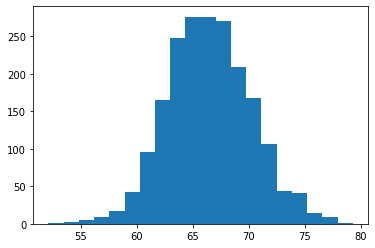

In [ ]:
plt.hist(heights, bins=20, align='mid', rwidth=1)

### Visualisation

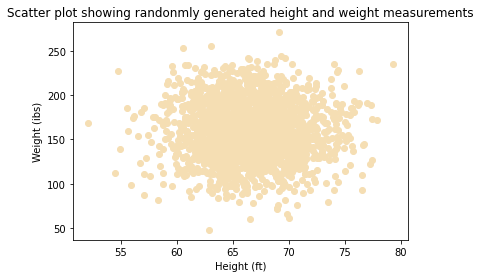

In [ ]:
x = heights
y = weights
plt.scatter(x, y, color = 'wheat')

#x = data_male['Height']
#y = data_male['Weight']
#plt.scatter(x, y, color = 'powderblue')

plt.xlabel("Height (ft)")
plt.ylabel("Weight (ibs)")

plt.title("Scatter plot showing randonmly generated height and weight measurements")


plt.show()

In [ ]:
new_X = pandas.DataFrame(heights, columns=['Heights'])
new_X['Weights'] = weights
new_X

,Heights,Weights
0,71.542501,129.481197
1,54.803725,227.534467
2,61.650385,205.372115
3,66.349934,193.017872
4,63.122913,89.618030
...,...,...
1995,70.532920,158.346975
1996,66.880869,148.104777
1997,64.116435,129.160445
1998,73.808020,218.975586


In [ ]:
new_X

,Heights,Weights
0,71.542501,129.481197
1,54.803725,227.534467
2,61.650385,205.372115
3,66.349934,193.017872
4,63.122913,89.618030
...,...,...
1995,70.532920,158.346975
1996,66.880869,148.104777
1997,64.116435,129.160445
1998,73.808020,218.975586


In [ ]:
new_y_pred= gender_model.predict(new_X)


In [ ]:
print(new_y_pred[:200])

['Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Male' 'Female' 'Female'
 'Male' 'Female' 'Male' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Female' 'Male' 'Female' 'Male' 'Female'
 'Female' 'Male' 'Female' 'Female' 'Female' 'Female' 'Female' 'Female'
 'Female' 'Male' 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male'
 'Male' 'Male' 'Female' 'Female' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Male' 'Female' 'Female'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Female' 'Female' 'Female' 'Male' 'Male' 'Male' 'Male' 'Female' 'Male'
 'Female' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male' 'Female'
 'Male' 'Female' 'Female' 'Female' 'Male' 'Female' 'Male' 'Male' 'Male'
 'Male' 'Female' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Male' 'Female' 'Male' 'Male' 'Male' 'Male'
 'Male' 'Male' 'Female' 'Male' 'Female' 'Female' 'Male' 'Male'

In [ ]:
new_X['Prediction'] = new_y_pred


In [ ]:
new_X[10:20]

,Heights,Weights,Prediction
10,64.767699,145.208616,Female
11,64.432518,184.198315,Male
12,71.289967,139.714739,Male
13,63.867947,179.744743,Male
14,71.403626,124.267997,Female
15,68.432742,145.965008,Female
16,63.937379,138.199835,Female
17,65.847900,206.186872,Male
18,60.581975,186.753420,Female
19,73.071038,171.324758,Male


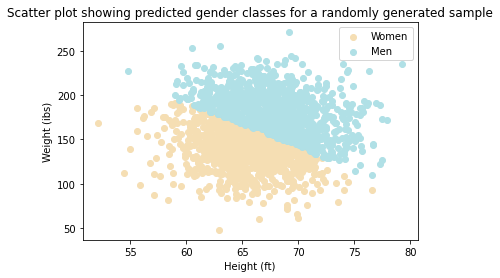

In [ ]:

data_female = new_X.loc[new_X['Prediction'] == 'Female']
data_male = new_X.loc[new_X['Prediction'] == 'Male']
x = data_female['Heights']
y = data_female['Weights']
plt.scatter(x, y, color = 'wheat')

x = data_male['Heights']
y = data_male['Weights']
plt.scatter(x, y, color = 'powderblue')

plt.xlabel("Height (ft)")
plt.ylabel("Weight (ibs)")

plt.title("Scatter plot showing predicted gender classes for a randomly generated sample")
plt.legend(['Women', 'Men'])

plt.show()

Decision boundary can be observed as the diagonal line dividing Men from Women in the plot (lineal division)

